In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv(r"C:\Users\naruna1x\OneDrive - Intel Corporation\Desktop\customer conersion\train.csv")

# Data Understanding

In [8]:
print(data)

       age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0 

In [7]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
data.values.shape

(45211, 11)

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [9]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### Data Visualization 

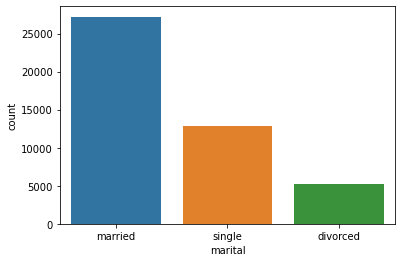

In [11]:
sns.countplot(x='marital',data=data)
plt.show()

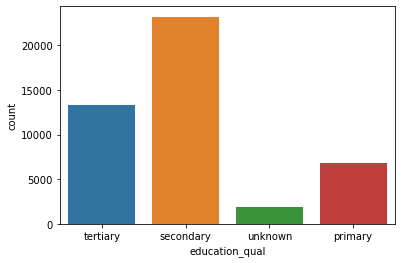

In [12]:
sns.countplot(x='education_qual',data=data)
plt.show()

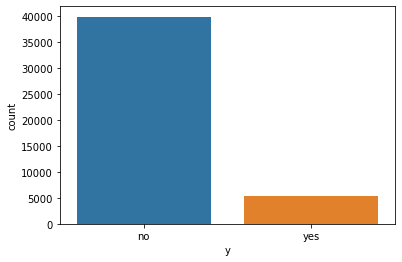

In [13]:
sns.countplot(x='y',data=data)
plt.show()

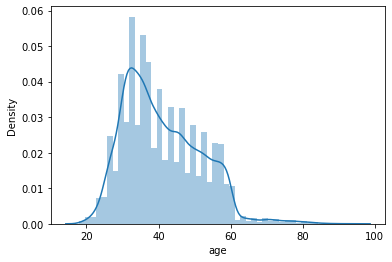

In [14]:
sns.distplot(data['age'],kde=True)
plt.show()

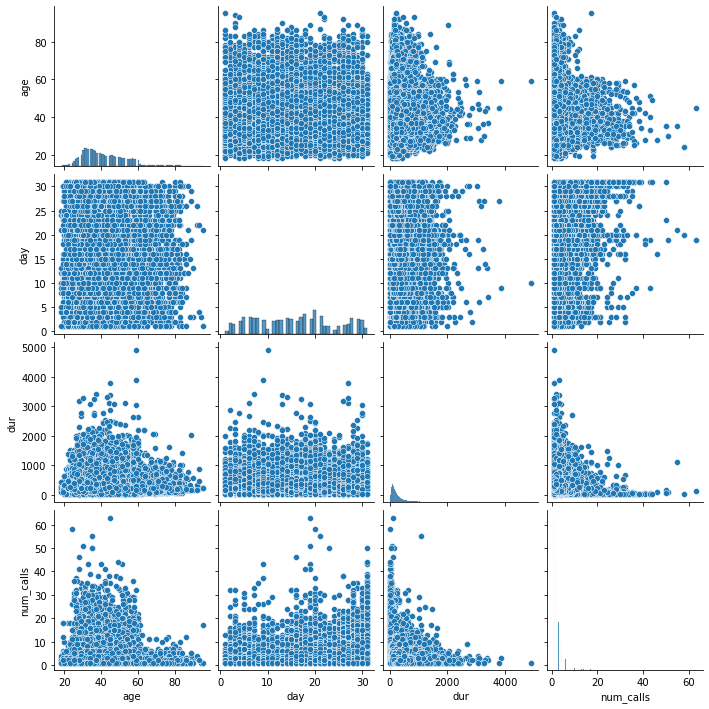

In [15]:
#pairplot
sns.pairplot(data)
plt.show()

### Data wrangling

### Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['education_qual']=le.fit_transform(data['education_qual'])
data['call_type']=le.fit_transform(data['call_type'])
data['mon']=le.fit_transform(data['mon'])
data['prev_outcome']=le.fit_transform(data['prev_outcome'])
data['y']=le.fit_transform(data['y'])
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,17,9,977,3,3,1
45207,71,5,0,0,0,17,9,456,2,3,1
45208,72,5,1,1,0,17,9,1127,5,2,1
45209,57,1,1,1,1,17,9,508,4,3,0


In [18]:
col=data.columns
col

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [19]:
corr=data.corr()

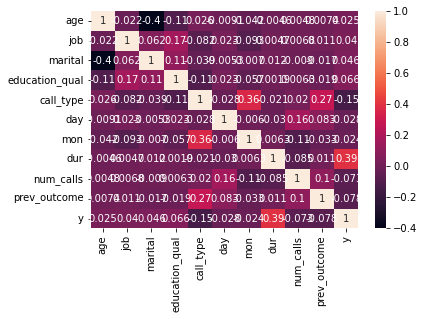

In [25]:

sns.heatmap(corr,annot=True)
plt.show()

In [26]:
x=data.drop('y', axis=1)
y=data['y']

### Data spliting

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

### Standard scaler

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### LogisticRegression model1


In [29]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
plt.show()

In [30]:
ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

In [31]:
score_1=log_model.score(x_train, y_train)
score_1

0.8917116946314027

In [32]:
score_1=log_model.score(x_test, y_test)
score_1

0.8886021822471247

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(log_model,x,y,cv=5)
print(score)
score.mean()

[0.89870618 0.89946914 0.8870825  0.83244857 0.84339748]


0.8722207762401775

In [34]:
results = pd.DataFrame(columns=['log_model', 'test_accuracy'])
new = ['log_model', score_1]
results.loc[0] = new

In [35]:
results

,log_model,test_accuracy
0,log_model,0.888602


### Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
plt.show()

In [37]:
base_pred=d_tree.predict(x_test)
pred_train=d_tree.predict(x_train)

In [38]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score


In [39]:
accuracy_score(y_train,pred_train)


1.0

In [40]:
accuracy_score(y_test,base_pred)


0.8741521675022117

### Hyperparemeter tuniung

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5)}

In [43]:
grid_search = GridSearchCV(d_tree, param_grid, cv=5)

In [44]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)})

In [45]:
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [46]:
from sklearn.tree import DecisionTreeClassifier
d_tree= DecisionTreeClassifier(max_depth=6, min_samples_leaf= 4, min_samples_split=3,random_state=1)
d_tree.fit(x_train, y_train)


ypred_train = d_tree.predict(x_train)
ypred_test = d_tree.predict(x_test)


print('train_score',d_tree.score(x_train, y_train))
print('test_score', d_tree.score(x_test, y_test))
accuracy_score(y_test,base_pred)


train_score 0.9064366290643663
test_score 0.8972279563550575


0.8741521675022117

In [49]:
score_2=d_tree.score(x_train, y_train)


In [50]:
score_2=d_tree.score(x_test, y_test)


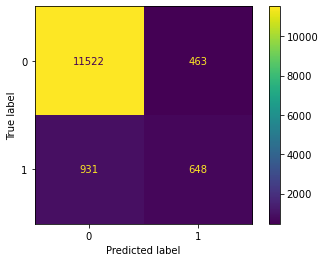

In [51]:
plot_confusion_matrix(d_tree,x_test,y_test)


In [52]:
new = ['d_tree',score_2]
results.loc[1] = new
results

,log_model,test_accuracy
0,log_model,0.888602
1,d_tree,0.897228


### Random Forest model3

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)


In [54]:
# modelling
from sklearn.ensemble import RandomForestClassifier
rf_tree=RandomForestClassifier()
rf_tree.fit(x_train,y_train)

ypred_train=rf_tree.predict(x_train)
ypred_test=rf_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.9041580654674137


### Hyperparemeter tuniung

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
estimator=RandomForestClassifier()
param_grid = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5)}

In [50]:
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)


In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)},
             scoring='accuracy')

In [52]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [53]:
rf_tree = RandomForestClassifier(n_estimators=9, max_depth=4,min_samples_split=2, random_state=0)
rf_tree.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=9, random_state=0)

In [54]:
ypred_train1=rf_tree.predict(x_train)
ypred_test1=rf_tree.predict(x_test)

In [55]:
print("Train accuracy:",accuracy_score(ypred_train1,y_train))
print("Test accuracy:",accuracy_score(ypred_test1,y_test))

Train accuracy: 0.8890258160331153
Test accuracy: 0.8920672368033029


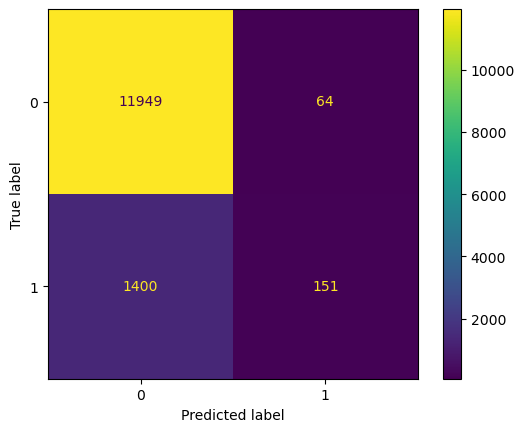

In [71]:
plot_confusion_matrix(rf_tree,x_test,y_test)


In [56]:
score_3=accuracy_score(ypred_train1,y_train)

In [57]:
score_3=accuracy_score(ypred_test1,y_test)

In [58]:
new = ['rf_tree', score_3]
results.loc[2] = new
results

,log_model,test_accuracy
0,log_model,0.888602
1,d_tree,0.897228
2,rf_tree,0.892067


### xgboost model

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb_model= XGBClassifier()

In [61]:
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
y_pred_train=xgb_model.predict(x_train)
y_pred_test=xgb_model.predict(x_test)

In [63]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train=xgb_model.predict(x_train)
y_pred_test=xgb_model.predict(x_test)


In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9510854109394256
0.9036419935122383


In [65]:
score_4=accuracy_score(y_train,y_pred_train)

In [66]:
score_4=accuracy_score(y_test,y_pred_test)

In [67]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=xgb_model,X=x_train, y=y_train,cv=5)
accuracies.mean()# In this cross_val_score x should be capital

0.9045723976270119

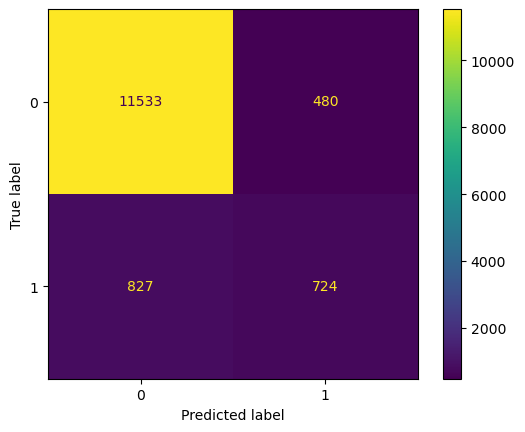

In [68]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(xgb_model,x_test,y_test))

In [69]:
new = ['xgb_model', score_4]
results.loc[3] = new
results

,log_model,test_accuracy
0,log_model,0.888602
1,d_tree,0.897228
2,rf_tree,0.892067
3,xgb_model,0.903642
